# Assignment 7
### Do any five.

## 4.

- The **covariance** of $X$ and $Y$ is
$$
\text{cov}(X,Y) = \int_{y} \int_{x} (x-\mathbb{E}[X])(y-\mathbb{E}[Y])f_{XY}(x,y) dxdy = \mathbb{E}_{XY}[ (x-\mu_X)(y-\mu_Y)]
$$





- Show that if $f_{XY}(x,y)=f_X(x)f_Y(y)$, then $\text{cov}(X,Y)=0$

\begin{alignat*}{2}
\text{cov}(X,Y) &=& \int_{y} \int_{x} (x-\mathbb{E}[X])(y-\mathbb{E}[Y])f_{X}(x)F_y(y) dxdy \\
&=& \int_{y} \left[ \int_{x} (x-\mathbb{E}[X])f_{X}(x) dx \right] (y-\mathbb{E}[Y])F_y(y)dy \\
&=& \int_{y} \left[ \int_{x} xf_{X}(x) dx-\mathbb{E}[X] \right] (y-\mathbb{E}[Y])F_y(y)dy \\
&=& \int_{y} \left[ \mathbb{E}[X]-\mathbb{E}[X] \right] (y-\mathbb{E}[Y])F_y(y)dy \\
&=& \int_{y} \left[ 0 \right] (y-\mathbb{E}[Y])F_y(y)dy \\
&=& 0
\end{alignat*}

- Provide an example (computation/simulation is fine) where $\text{cov}(X,Y)\approx 0$ but $f_{XY}(x,y)\neq 0$

- The covariance doesn't characterize joint random variables except in a few special cases: The covariance only captures the **linear** association between the two variables, not nonlinear associations.

Suppose $Y = |X| + \sigma \varepsilon$ where $X$ has a standard normal distribution. Then we know that $Y$ and $X$ have a non-trival density:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Define Parameters and Simulate Data

# Numbers of data points for the simulation

N = 100000

# The standard deviation for the error term (sigma).
# Make it small but visible to capture the dependence.
# A value like 0.1 or 0.2 works well.

sigma = 0.2

# Generate X from a standard normal distribution: X ~ N(0, 1)
X = np.random.normal(loc=0, scale=1, size=N)

# Generate epsilon from a standard normal distribution: epsilon ~ N(0, 1)
# Ensure epsilon is independent of X
epsilon = np.random.normal(loc=0, scale=1, size=N)

# Calculate Y = |X| + sigma * epsilon
Y = np.abs(X) + sigma * epsilon

In [3]:
# 2. Calculate the Sample Covariance

# The formula is Cov(X, Y) = E[XY] - E[X]E[Y].
# In the simulation, this is the sample covariance.
cov_matrix = np.cov(X, Y)

# cov_matrix[0, 1] is the covariance between X and Y
sample_covariance = cov_matrix[0, 1]

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/var/folders/n2/lt2mc7z901q9k1mx_2s6ypb00000gn/T/ipykernel_79950/1062625586.py:9: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f'Scatter Plot of $Y = |X| + \sigma\\epsilon$ ($\\sigma$ = {sigma})', fontsize=16)


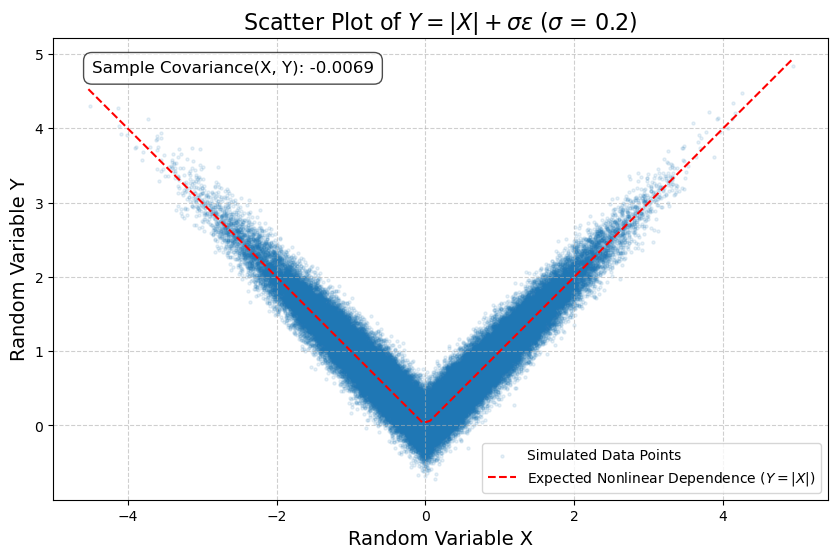

Sample Covariance(X, Y): -0.0069


In [4]:
# 3. Plot the Results
plt.figure(figsize=(10, 6))

# Plot the scatter plot of the simulated (X, Y) pairs
# Use a low alpha value to show density
plt.scatter(X, Y, s=5, alpha=0.1, label='Simulated Data Points')

# Add a title and labels
plt.title(f'Scatter Plot of $Y = |X| + \sigma\\epsilon$ ($\\sigma$ = {sigma})', fontsize=16)
plt.xlabel('Random Variable X', fontsize=14)
plt.ylabel('Random Variable Y', fontsize=14)

# Display the calculated covariance on the plot
plt.text(
    0.05, 0.95,
    f'Sample Covariance(X, Y): {sample_covariance:.4f}',
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.7)
)

# Draw the expected relationship Y = |X| (in red dashed lines)
# This shows the strong *nonlinear* association
x_range = np.linspace(np.min(X), np.max(X), 100)
y_expected = np.abs(x_range)
plt.plot(x_range, y_expected, 'r--', label='Expected Nonlinear Dependence ($Y = |X|$)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

print(f"Sample Covariance(X, Y): {sample_covariance:.4f}")

